### Crypto Sentiment Analysis using NEWSAPI
---


In [1]:
# Initial imports
import os
try:
    width = os.get_terminal_size().columns
except OSError:
    pass 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from newsapi import NewsApiClient
import pandas as pd
from dotenv import load_dotenv
from nltk.corpus import stopwords, reuters
import nltk as nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
tokenization_df = pd.DataFrame()
from wordcloud import WordCloud
load_dotenv()

%matplotlib inline

# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

bitcoin_news["totalResults"]
raw_btcusd = pd.DataFrame(bitcoin_news)
raw_btcusd.to_csv('btcusd_raw.csv')

# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum",
    language="en"
)

ethereum_news["totalResults"]
raw_ethusd = pd.DataFrame(ethereum_news)
raw_ethusd.to_csv('ethusd_raw.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jteel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Create the Bitcoin sentiment scores DataFrame
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result


# Create the Bitcoin sentiment scores DataFrame
def create_btcusd_df(bitcoin_news, language):
    btcusd_articles = []
    for article in bitcoin_news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            btcusd_articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(btcusd_articles)

bitcoin_news_df = create_btcusd_df(bitcoin_news["articles"], "en")
print(f'Stored all news articles into dataframe:')
print(f'{bitcoin_news_df.head(1)}')
print('')


print('Using nltk library to calculate sentiment scores..')
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in bitcoin_news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
bitcoin_news_df = bitcoin_news_df.join(title_sentiment_df).join(text_sentiment_df)
print('')
print(f'Joined sentiment scores to news article dataframe:')
bitcoin_news_df.to_csv('bitcoin.csv')
bitcoin_news_df.head(2)

Stored all news articles into dataframe:
                                               title  \
0  Hitting the Books: How Bitcoin is somehow wort...   

                                         description  \
0  Bitcoin and similar blockchain-based cryptos e...   

                                                text        date language  
0  Bitcoin and similar blockchain-based cryptos e...  2021-09-25       en  

Using nltk library to calculate sentiment scores..

Joined sentiment scores to news article dataframe:


,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Hitting the Books: How Bitcoin is somehow wort...,Bitcoin and similar blockchain-based cryptos e...,Bitcoin and similar blockchain-based cryptos e...,2021-09-25,en,0.2263,0.119,0.881,0.0,1.0,0.00,0.000,1.000,0.0,0.0
1,Bitcoin hits strongest level since May,"<ul><li>Bitcoin, in terms of market value, ros...","<ul><li>Bitcoin, in terms of market value, ros...",2021-10-06,en,0.4404,0.367,0.633,0.0,1.0,0.34,0.076,0.924,0.0,1.0


In [7]:
# Create the Ethereum sentiment scores DataFrame
def create_ethusd_df(ethereum_news, language):
    ethusd_articles = []
    for article in ethereum_news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            ethusd_articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(ethusd_articles)

ethereum_news_df = create_ethusd_df(ethereum_news["articles"], "en")
print(f'Stored all news articles into dataframe:')
print(f'{ethereum_news_df.head(2)}')
print('')

print('Using nltk library to calculate sentiment scores..')
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in ethereum_news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
ethereum_news_df = ethereum_news_df.join(title_sentiment_df).join(text_sentiment_df)
print('')
print(f'Joined sentiment scores to news article dataframe:')
ethereum_news_df.to_csv('ethereum.csv')
ethereum_news_df.head(3)

Stored all news articles into dataframe:
                                               title  \
0  Nervos launches cross-chain bridge to connect ...   
1  China’s central bank bans cryptocurrency trans...   

                                         description  \
0  A new cross-chain bridge is currently connecte...   
1  China’s central bank on Friday said cryptocurr...   

                                                text        date language  
0  A new cross-chain bridge is currently connecte...  2021-10-16       en  
1  Its the countrys latest crackdown on digital c...  2021-09-24       en  

Using nltk library to calculate sentiment scores..

Joined sentiment scores to news article dataframe:


,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Nervos launches cross-chain bridge to connect ...,A new cross-chain bridge is currently connecte...,A new cross-chain bridge is currently connecte...,2021-10-16,en,0.000,0.0,1.000,0.000,0,0.0,0.0,1.0,0.0,0
1,China’s central bank bans cryptocurrency trans...,China’s central bank on Friday said cryptocurr...,Its the countrys latest crackdown on digital c...,2021-09-24,en,-0.296,0.0,0.784,0.216,-1,0.0,0.0,1.0,0.0,0
2,"Mark Cuban Heralds Ethereum, Bitcoin",Mark Cuban has some advice for people who are ...,Mark Cuban has some advice for people who are ...,2021-10-14,en,0.000,0.0,1.000,0.000,0,0.0,0.0,1.0,0.0,0


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_stats = bitcoin_news_df.describe()
try:
    print("Bitcoin Sentiment Results".center(width))
except:
    print('Bitcoin Sentiment Results')
print('')
print('')

# Visualize title and text sentiment
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=bitcoin_news_df.index, y=bitcoin_news_df['title_sent'], name="Title Sentiment"),
    row=1, col=1, secondary_y=False)

fig.add_trace(
    go.Scatter(x=bitcoin_news_df.index, y=bitcoin_news_df['text_sent'], name="Text Sentiment"),
    row=1, col=1, secondary_y=True,
)
fig.show()


Bitcoin Sentiment Results

       title_compound  title_pos  title_neu  title_neg  title_sent  \
count       19.000000  19.000000  19.000000  19.000000   19.000000   
mean         0.079995   0.075474   0.893000   0.031526    0.157895   
std          0.257628   0.127583   0.132149   0.067215    0.688247   
min         -0.296000   0.000000   0.633000   0.000000   -1.000000   
25%          0.000000   0.000000   0.800000   0.000000    0.000000   
50%          0.000000   0.000000   1.000000   0.000000    0.000000   
75%          0.126950   0.124000   1.000000   0.000000    1.000000   
max          0.694600   0.367000   1.000000   0.216000    1.000000   

       text_compound   text_pos   text_neu   text_neg  text_sent  
count      19.000000  19.000000  19.000000  19.000000  19.000000  
mean        0.171789   0.064421   0.917474   0.018158   0.315789  
std         0.309393   0.071215   0.071055   0.035118   0.749269  
min        -0.440400   0.000000   0.781000   0.000000  -1.000000  
25%    

In [9]:
#Print summary of neutral, positive & negative.
print('')
btcusd_negative = bitcoin_sentiment_stats['title_neg'].iloc[1]
btcusd_negative_percentage = '{:.1%}'.format(btcusd_negative)
print(f'{btcusd_negative_percentage} of Bitcoin articles are negative')
print('')

btcusd_positive = bitcoin_sentiment_stats['title_pos'].iloc[1]
btcusd_positive_percentage = '{:.1%}'.format(btcusd_positive)
print(f'{btcusd_positive_percentage} of Bitcoin articles are positive')
print('')

btcusd_neutral = bitcoin_sentiment_stats['title_neu'].iloc[1]
btcusd_neutral_percentage = '{:.1%}'.format(btcusd_neutral)
print(f'{btcusd_neutral_percentage} of Bitcoin articles are neutral')


3.2% of Bitcoin articles are negative

7.5% of Bitcoin articles are positive

89.3% of Bitcoin articles are neutral


In [10]:
# Describe the Ethereum Sentiment
ethusd_sentiment_stats = ethereum_news_df.describe()
try:
    print("Ethereum Sentiment Results".center(width))
except:
    print('Ethereum Sentiment Results')
print('')
print(ethusd_sentiment_stats)
print('')

# Visualize title and text sentiment
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=ethereum_news_df.index, y=ethereum_news_df['title_sent'], name="Title Sentiment"),
    row=1, col=1, secondary_y=False)

fig.add_trace(
    go.Scatter(x=ethereum_news_df.index, y=ethereum_news_df['text_sent'], name="Text Sentiment"),
    row=1, col=1, secondary_y=True,
)
fig.show()
print('')
ethusd_negative = ethusd_sentiment_stats['title_neg'].iloc[1]
ethusd_negative_percentage = '{:.1%}'.format(ethusd_negative)
print(f'{ethusd_negative_percentage} of ethereum articles are negative')
print('')
ethusd_positive = ethusd_sentiment_stats['title_pos'].iloc[1]
ethusd_positive_percentage = '{:.1%}'.format(ethusd_positive)
print(f'{ethusd_positive_percentage} of ethereum articles are positive')
print('')
ethusd_neutral = ethusd_sentiment_stats['title_neu'].iloc[1]
ethusd_neutral_percentage = '{:.1%}'.format(ethusd_neutral)
print(f'{ethusd_neutral_percentage} of ethereum articles are neutral')

Ethereum Sentiment Results

       title_compound  title_pos  title_neu  title_neg  title_sent  \
count       20.000000  20.000000  20.000000  20.000000   20.000000   
mean         0.023575   0.045650   0.909500   0.044850    0.100000   
std          0.304987   0.089844   0.127688   0.111993    0.640723   
min         -0.690800   0.000000   0.659000   0.000000   -1.000000   
25%          0.000000   0.000000   0.844750   0.000000    0.000000   
50%          0.000000   0.000000   1.000000   0.000000    0.000000   
75%          0.056575   0.029000   1.000000   0.000000    0.250000   
max          0.599400   0.329000   1.000000   0.341000    1.000000   

       text_compound   text_pos   text_neu   text_neg  text_sent  
count      20.000000  20.000000  20.000000  20.000000   20.00000  
mean        0.187510   0.040150   0.955750   0.004100    0.35000  
std         0.277651   0.062489   0.069902   0.012822    0.48936  
min         0.000000   0.000000   0.792000   0.000000    0.00000  
25%   


4.5% of ethereum articles are negative

4.6% of ethereum articles are positive

90.9% of ethereum articles are neutral


Bitcoin had the highest mean positive score

Ethereum had the highest compound score

Bitcoin had the highest positive score


---

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
nltk_stop_words = set(stopwords.words('english'))
stop_words_list = list(nltk_stop_words)
# Expand the default stopwords list if necessary
include_in_stopwords = ['reuters']
remove_from_stopwords = ['all', 'below', 'being', 'too']
stop_words = [elem for elem in stop_words_list if elem not in remove_from_stopwords]
print(stop_words)

['were', 'aren', "it's", 'having', 'some', "hadn't", 'its', "she's", 'an', 'few', 'myself', 'why', "you're", 'couldn', 'same', 're', 'into', 'under', "isn't", 'just', 'shan', 'mightn', 'up', 'here', 'above', "aren't", 'once', 'your', 'and', 'y', 'll', 'after', 'mustn', 'as', 'herself', 'isn', 'this', 'd', 'now', 'did', 'most', 'nor', 'hadn', 'you', 'needn', 'of', 'we', 'had', 'haven', 'o', "won't", 'be', 'ours', 'hers', 'than', "shan't", 'it', "wouldn't", 'not', 'again', 'she', 'wouldn', 'over', 's', 'on', "wasn't", 'a', 'does', 'there', 'yourselves', 'further', 'the', 'during', 'hasn', 'them', 'so', "shouldn't", 'between', 'has', 'for', 'ourselves', 've', 'through', 'her', 'yourself', 'theirs', 'which', 'have', 'each', "hasn't", 'wasn', "that'll", 'these', 'itself', 'because', 'won', 'yours', 'then', 'own', 'themselves', 'am', 'against', 't', "you'll", 'any', 'doesn', 'i', 'shouldn', 'if', "didn't", 'or', "you'd", 'don', "don't", "doesn't", 'what', 'do', 'out', 'will', "couldn't", 'me

In [13]:
# Complete the tokenizer function
def process_text(article):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in stop_words]
    return output

In [14]:
# Create a new tokens column for Bitcoin
btcusd_text = bitcoin_news_df.text.tolist()
btcusd_tokenized = []
for row in btcusd_text:
    tokenization = process_text(row)
    btcusd_tokenized.append(tokenization)
bitcoin_news_df['tokenized'] = btcusd_tokenized
bitcoin_news_df.head(2)

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokenized
0,Hitting the Books: How Bitcoin is somehow wort...,Bitcoin and similar blockchain-based cryptos e...,Bitcoin and similar blockchain-based cryptos e...,2021-09-25,en,0.2263,0.119,0.881,0.0,1.0,0.00,0.000,1.000,0.0,0.0,"[bitcoin, similar, blockchainbased, cryptos, e..."
1,Bitcoin hits strongest level since May,"<ul><li>Bitcoin, in terms of market value, ros...","<ul><li>Bitcoin, in terms of market value, ros...",2021-10-06,en,0.4404,0.367,0.633,0.0,1.0,0.34,0.076,0.924,0.0,1.0,"[ullibitcoin, term, market, value, rose, lilii..."


In [15]:
# Create a new tokens column for Ethereum
ethusd_text = ethereum_news_df.text.tolist()
ethusd_tokenized = []
for row in ethusd_text:
    tokenization = process_text(row)
    ethusd_tokenized.append(tokenization)
ethereum_news_df['tokenized'] = ethusd_tokenized
ethereum_news_df.head(2)

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokenized
0,Nervos launches cross-chain bridge to connect ...,A new cross-chain bridge is currently connecte...,A new cross-chain bridge is currently connecte...,2021-10-16,en,0.000,0.0,1.000,0.000,0,0.0,0.0,1.0,0.0,0,"[new, crosschain, bridge, currently, connected..."
1,China’s central bank bans cryptocurrency trans...,China’s central bank on Friday said cryptocurr...,Its the countrys latest crackdown on digital c...,2021-09-24,en,-0.296,0.0,0.784,0.216,-1,0.0,0.0,1.0,0.0,0,"[country, latest, crackdown, digital, currenci..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams
def process_text_grams(tokenized):
    bigrams = ngrams(tokenized, 2)
    output = ['_'.join(i) for i in bigrams]
    return ' '.join(output)

In [17]:
# Generate the Bitcoin N-grams where N=2
btcusd_grams = []
for row in btcusd_tokenized:
    grams = process_text_grams(row)
    btcusd_grams.append(tokenization)
print(f'Check: {len(btcusd_grams)} BTCUSD ngrams vs. {len(bitcoin_news_df.index)} BTCUSD raw articles')
print('')
csv = pd.DataFrame(btcusd_grams)
csv.to_csv('check.csv')

Check: 20 BTCUSD ngrams vs. 20 BTCUSD raw articles



In [18]:
# Generate the Ethereum N-grams where N=2
ethusd_grams = []
for row in ethusd_tokenized:
    grams = process_text_grams(row)
    btcusd_grams.append(tokenization)
print(f'Check: {len(ethusd_grams)} ETHUSD ngrams vs. {len(ethereum_news_df.index)} ETHUSD raw articles')
print('')
ethusd_grams

Check: 0 ETHUSD ngrams vs. 20 ETHUSD raw articles



[]

In [19]:
# Function token_count generates the top 10 words for a given coin
def word_count(article):
    big_string = ' '.join(article)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
btcusd_top_count = word_count(btcusd_text)

,word,count
0,char,17
1,bitcoin,15
2,cryptocurrency,6
3,four,3
4,utoday,3
5,httpsifttteavj,3
6,country,3
7,digital,3
8,bank,3
9,said,3


In [21]:
# Use token_count to get the top 10 words for Ethereum
ethusd_top_count = word_count(ethusd_text)

,word,count
0,char,20
1,bitcoin,13
2,cryptocurrency,7
3,ethereum,6
4,ha,5
5,nfts,5
6,illustration,5
7,taken,5
8,reuters,5
9,new,4


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

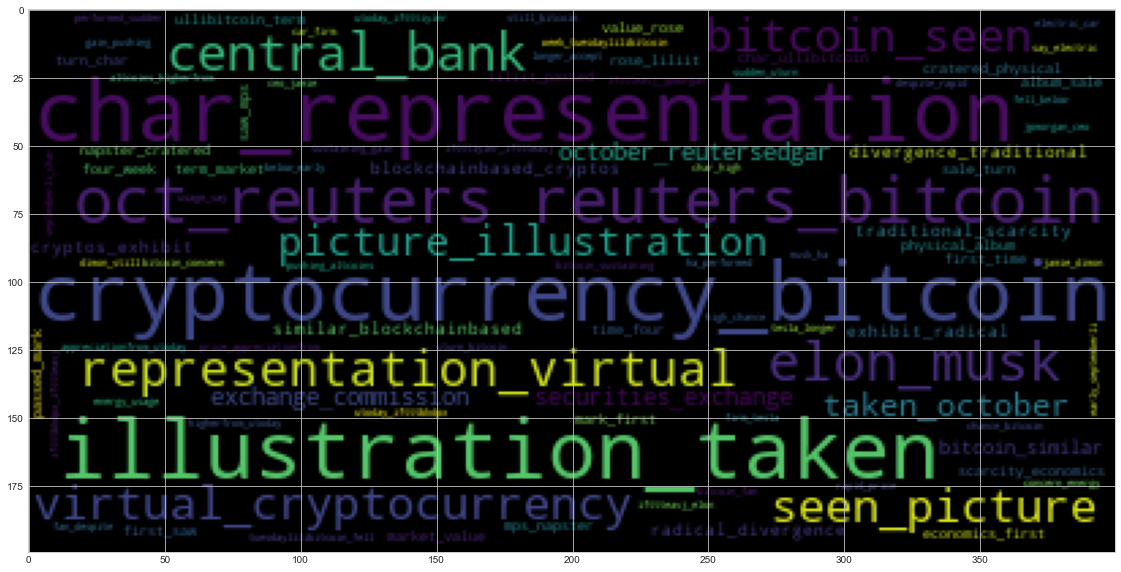

In [23]:
# Generate the Bitcoin word cloud
btcusd_combined = ' '.join(bitcoin_news_df['text'].tolist())
btcusd_combined = re.sub("https:", "", btcusd_combined)

def process_text_bg(doc):
    sw = stop_words
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_words = [word.lower() for word in lem if word.lower() not in stop_words]
    bigrams = ngrams(sw_words, 2)
    output = ['_'.join(i) for i in bigrams]
    return ' '.join(output)

input_words = process_text_bg(btcusd_combined)
wc = WordCloud().generate(input_words)
plt.imshow(wc)

def tokenizer(text):
    #    """Tokenizes text."""
    sw = stop_words
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Remove the stop words
    # Convert the words to lowercase
    sw_words = [word.lower() for word in lem if word.lower() not in stop_words]
    bigrams = ngrams(sw_words, 2)
    output = ['_'.join(i) for i in bigrams]
    return ' '.join(output)

input_words = process_text_bg(btcusd_combined)
wc = WordCloud().generate(input_words)
plt.imshow(wc)

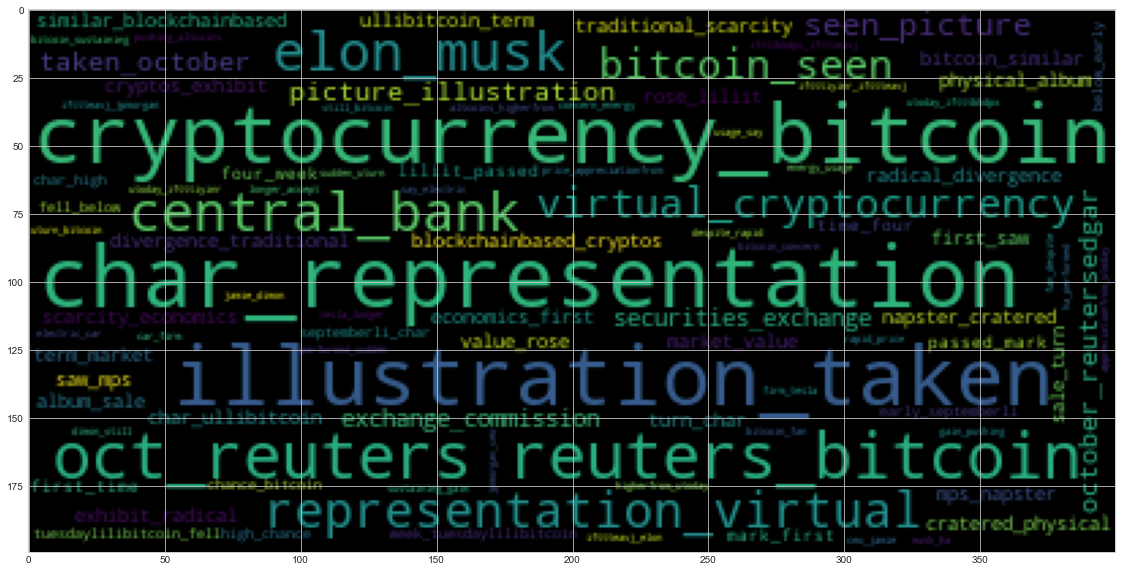

In [24]:
# Generate the Ethereum word cloud
ethusd_combined = ' '.join(bitcoin_news_df['text'].tolist())
ethusd_combined = re.sub("https:", "", ethusd_combined)

input_words = process_text_bg(ethusd_combined)
wc = WordCloud().generate(input_words)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy
# Download the language model for SpaCy
#!python -m spacy download en_core_web_smdd

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')
nlp

---
### Bitcoin NER

In [26]:
# Concatenate all of the Bitcoin text together
print(f'There are {len(btcusd_combined)} strings analyzed for Bitcoin:')

# Run the NER processor on all of the text
doc = nlp(btcusd_combined)

# Render the visualization
displacy.render(doc, style='ent')

There are 4048 strings analyzed for Bitcoin:



---

### Ethereum NER

In [27]:
# Concatenate all of the Bitcoin text together
print(f'There are {len(ethusd_combined)} strings analyzed for Ethereum:')

# Run the NER processor on all of the text
doc = nlp(ethusd_combined)

# Render the visualization
displacy.render(doc, style='ent')

There are 4048 strings analyzed for Ethereum:



---